In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

In [55]:
data_path = ('./yelp_labelled.txt')
rev_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
rev_raw.columns = ['review', 'sentiment']

In [56]:
 rev_raw.loc[rev_raw.sentiment == 0, 'review'].str.split(expand=True).stack().value_counts() 

the                191
I                  181
and                160
was                155
to                 129
a                  121
not                 87
The                 82
of                  72
is                  67
for                 62
this                48
it                  47
be                  44
in                  44
food                43
that                41
at                  38
place               37
but                 36
had                 31
with                30
my                  29
so                  29
like                29
have                28
were                27
are                 26
go                  25
we                  25
                  ... 
boiled               1
finish               1
ripped,              1
sashimi.             1
Vegas,               1
set                  1
$4.00.               1
beyond               1
call                 1
vinegrette           1
of,                  1
stayed...            1
tops       

In [57]:
keywords = ['bad', 'not', 'worse', 'worst', 'don\'t', 'nasty', 'dirty', 'damn' , 'no', 'poor', 'never','so', 'hate']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    rev_raw[str(key)] = rev_raw.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [58]:
rev_raw['allcaps'] = rev_raw.review.str.isupper()

In [59]:
rev_raw['neg_sentiment'] = (rev_raw['sentiment'] == 0)

In [60]:
rev_raw.head()

,review,sentiment,bad,not,worse,worst,don't,nasty,dirty,damn,no,poor,never,so,hate,allcaps,neg_sentiment
0,Wow... Loved this place.,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
2,Not tasty and the texture was just nasty.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,Stopped by during the late May bank holiday of...,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


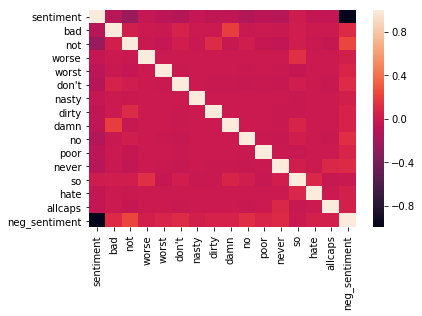

In [61]:
sns.heatmap(rev_raw.corr())

In [62]:
data = rev_raw[keywords + ['allcaps']]
target = rev_raw['neg_sentiment']

In [63]:
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 362


In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[475,  25],
       [337, 163]])